In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("complete_student_analysis_dataset.csv")

In [5]:
df.head()

,student_id,math_original,science_original,english_original,attendance,math_int8,attendance_float32,weighted_total,math_mean,science_mean,...,grade,bonus_points,final_score,math_original_zscore,science_original_zscore,english_original_zscore,math_original_percentile,science_original_percentile,english_original_percentile,overall_performance
0,1001,82.45,76.70,65.00,71,82,71,76.08,73.4422,79.4485,...,C,0,76.08,0.661,-0.238,-1.706,35.70,60.20,65.00,Needs Improvement
1,1002,72.93,68.88,65.30,90,72,90,69.60,73.4422,79.4485,...,D,0,69.60,-0.038,-0.917,-1.672,45.19,60.37,65.30,Needs Improvement
2,1003,84.72,64.79,65.61,99,84,99,72.97,73.4422,79.4485,...,C,0,72.97,0.828,-1.272,-1.637,45.60,60.66,65.61,Good
3,1004,97.85,73.50,65.91,70,97,70,81.34,73.4422,79.4485,...,B,0,81.34,1.792,-0.516,-1.603,46.30,61.48,65.91,Needs Improvement
4,1005,71.49,97.72,66.21,97,71,97,79.35,73.4422,79.4485,...,C,0,79.35,-0.143,1.585,-1.569,48.55,61.63,66.21,Good


## 1. Create Array from Student Dataset Math Scores

In [6]:
math_scores_array = df['math_original'].to_numpy()
print("Math Scores Array:")
print(math_scores_array)

Math Scores Array:
[ 82.45  72.93  84.72  97.85  71.49  71.49  98.69  86.51  67.96  83.14
  68.05  68.01  78.63  46.3   49.13  66.57  59.81  79.71  61.38  53.82
  96.98  71.61  76.01  53.63  66.83  76.66  57.74  80.64  65.99  70.62
  65.97 102.78  74.8   59.13  87.34  56.69  78.13  45.6   55.08  77.95
  86.08  77.57  73.27  70.48  52.82  64.2   68.09  90.86  80.15  48.55
  79.86  69.22  64.85  84.18  90.46  88.97  62.41  70.36  79.97  89.63
  67.81  72.22  58.4   57.06  87.19  95.34  73.92  90.05  80.42  65.32
  80.42  98.07  74.46  98.47  35.7   87.33  76.31  70.51  76.38  45.19
  71.7   80.36  97.17  67.23  62.87  67.47  88.73  79.93  67.05  82.7
  76.46  89.53  64.47  70.09  69.12  53.05  79.44  78.92  75.08  71.48]


## 2. Generate Grade Boundaries Using linspace for Science Scores

In [7]:
min_science = df['science_original'].min()
max_science = df['science_original'].max()
grade_boundaries = np.linspace(min_science, max_science, 5) # Create 5 boundaries for A, B, C, D, F
print("Science Grade Boundaries:")
print(grade_boundaries)

Science Grade Boundaries:
[60.2    70.0075 79.815  89.6225 99.43  ]


## 3. Initialize Digital Attendance System with zeros

In [8]:
num_students = len(df)
attendance_system = np.zeros(num_students, dtype=int)
print("Initialized Digital Attendance System (first 10 entries):")
print(attendance_system[:10])

Initialized Digital Attendance System (first 10 entries):
[0 0 0 0 0 0 0 0 0 0]


## 4. Optimize Memory Usage for Student Performance Grades

In [9]:
print(f"Original 'grade' dtype: {df['grade'].dtype}")
print("Before optimization memory usage:")
print(df['grade'].memory_usage(deep=True))
df['grade'] = df['grade'].astype('category')
print(f"Optimized 'grade' dtype: {df['grade'].dtype}")
print("Memory usage after optimization:")
print(df['grade'].memory_usage(deep=True))

Original 'grade' dtype: object
Before optimization memory usage:
5132
Optimized 'grade' dtype: category
Memory usage after optimization:
604


## 5. Optimize Storage for Math Scores Using Different Integer Types

In [ ]:
print(f"Original 'math_original' dtype: {df['math_original'].dtype}, "f"Memory: {df['math_original'].memory_usage(deep=True)}")

# 2) Convert math_original → int8 (correct conversion)
df['math_int8_fixed'] = df['math_original'].astype(np.int8)

# Show corrected int8 dtype + memory
print(f"'math_int8_fixed' dtype: {df['math_int8_fixed'].dtype}, "f"Memory: {df['math_int8_fixed'].memory_usage(deep=True)}")

# 3) Convert attendance → uint8 (correct)
df['attendance_uint8'] = df['attendance'].astype(np.uint8)

print(f"'attendance_uint8' dtype: {df['attendance_uint8'].dtype}, "f"Memory: {df['attendance_uint8'].memory_usage(deep=True)}")


Original 'math_original' dtype: float64, Memory: 932
'math_int8_fixed' dtype: int8, Memory: 232
'attendance_uint8' dtype: uint8, Memory: 232


## 6. Explore Float Precision with science_original Scores

In [11]:
print(f"'science_original' data type: {df['science_original'].dtype}")
print(f"Example of 'science_original' value: {df['science_original'].iloc[0]}")
# If it was float64, converting to float32 would reduce memory
df['science_original_float32'] = df['science_original'].astype(np.float32)
print(f"'science_original_float32' data type: {df['science_original_float32'].dtype}")
print(f"Memory usage 'science_original': {df['science_original'].memory_usage()} bytes")
print(f"Memory usage 'science_original_float32': {df['science_original_float32'].memory_usage()} bytes")

'science_original' data type: float64
Example of 'science_original' value: 76.7
'science_original_float32' data type: float32
Memory usage 'science_original': 932 bytes
Memory usage 'science_original_float32': 532 bytes


## 7. Optimize Memory for attendance Data

In [12]:
print(f"Original 'attendance' dtype: {df['attendance'].dtype}, Memory: {df['attendance'].memory_usage()}")
# If attendance values are typically within 0-100, uint8 is efficient
df['attendance_optimized'] = df['attendance'].astype(np.uint8)
print(f"Optimized 'attendance_optimized' dtype: {df['attendance_optimized'].dtype}, Memory: {df['attendance_optimized'].memory_usage()}")

Original 'attendance' dtype: int64, Memory: 932
Optimized 'attendance_optimized' dtype: uint8, Memory: 232


## 8. Compare Math Scores Between Different Student Groups

In [13]:
math_scores_by_grade = df.groupby('grade')['math_original'].mean()
print("Average Math Scores by Grade:")
print(math_scores_by_grade)

Average Math Scores by Grade:
grade
A    95.667500
B    83.802424
C    70.445532
D    55.320625
Name: math_original, dtype: float64


/var/folders/ml/9mx2r07s04b4mwc7b1_xj1240000gn/T/ipykernel_67987/4177718642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  math_scores_by_grade = df.groupby('grade')['math_original'].mean()


## 9. Calculate Average Scores with Custom Weights

In [ ]:
math_weight = 0.4
science_weight = 0.3
english_weight = 0.3

df['custom_weighted_score'] = (df['math_original'] * math_weight +
                                df['science_original'] * science_weight +
                                df['english_original'] * english_weight)
print("First 5 custom weighted scores:")
print(df.head())

First 5 custom weighted scores:
   math_original  science_original  english_original  custom_weighted_score
0          82.45             76.70             65.00                 75.490
1          72.93             68.88             65.30                 69.426
2          84.72             64.79             65.61                 73.008
3          97.85             73.50             65.91                 80.963
4          71.49             97.72             66.21                 77.775


## 10. Compare Attendance Between Different Student Groups

In [15]:
attendance_by_grade = df.groupby('grade')['attendance'].mean()
print("Average Attendance by Grade:")
print(attendance_by_grade)

Average Attendance by Grade:
grade
A    91.000000
B    84.939394
C    82.957447
D    89.875000
Name: attendance, dtype: float64


/var/folders/ml/9mx2r07s04b4mwc7b1_xj1240000gn/T/ipykernel_67987/3863985649.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_by_grade = df.groupby('grade')['attendance'].mean()


## 11. Find Class Performance Metrics from math_original Scores

In [16]:
class_math_mean = df['math_original'].mean()
class_math_median = df['math_original'].median()
class_math_std = df['math_original'].std()
class_math_min = df['math_original'].min()
class_math_max = df['math_original'].max()

print(f"Class Math Scores - Mean: {class_math_mean:.2f}, Median: {class_math_median:.2f}, Std Dev: {class_math_std:.2f}, Min: {class_math_min:.2f}, Max: {class_math_max:.2f}")

Class Math Scores - Mean: 73.44, Median: 73.10, Std Dev: 13.62, Min: 35.70, Max: 102.78


## 12. Analyze Score Distribution Using science_original Data

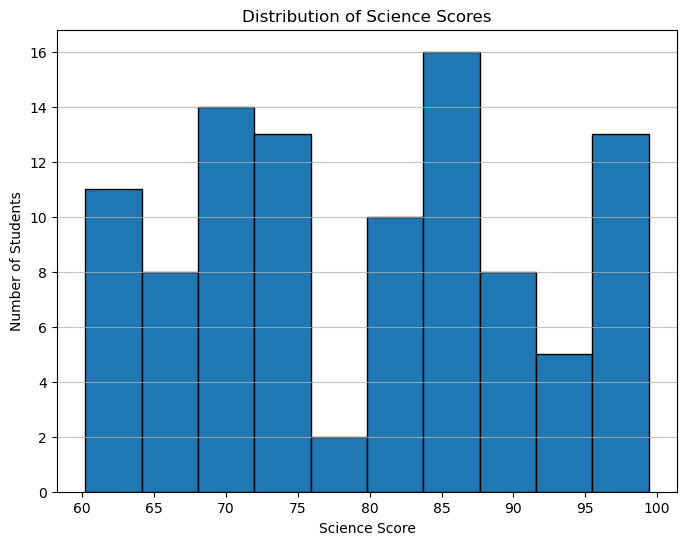

In [ ]:
%pip install matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['science_original'], bins=10, edgecolor='black')
plt.title('Distribution of Science Scores')
plt.xlabel('Science Score')
plt.ylabel('Number of Students')
plt.grid(axis='y', alpha=0.75)
plt.show()

## 13. Find Top Performers in english_original Test

In [18]:
top_performers_english = df.nlargest(5, 'english_original')
print("Top 5 Performers in English Test:")
print(top_performers_english[['student_id', 'english_original']])

Top 5 Performers in English Test:
    student_id  english_original
99        1100             95.00
98        1099             94.70
97        1098             94.39
96        1097             94.09
95        1096             93.79


## 14. Apply Bonus Points to math_original Scores

In [19]:
bonus_points = 5
df['math_with_bonus'] = df['math_original'] + bonus_points
print("First 5 Math Scores with Bonus:")
print(df[['math_original', 'math_with_bonus']].head())

First 5 Math Scores with Bonus:
   math_original  math_with_bonus
0          82.45            87.45
1          72.93            77.93
2          84.72            89.72
3          97.85           102.85
4          71.49            76.49


## 15. Scale attendance Data Based on Term Weights

In [20]:
term_weight = 0.8 # Example weight
df['scaled_attendance'] = df['attendance'] * term_weight
print("First 5 Scaled Attendance Scores:")
print(df[['attendance', 'scaled_attendance']].head())

First 5 Scaled Attendance Scores:
   attendance  scaled_attendance
0          71               56.8
1          90               72.0
2          99               79.2
3          70               56.0
4          97               77.6


## 16. Normalize science_original Scores Using Broadcasting

In [21]:
min_score = df['science_original'].min()
max_score = df['science_original'].max()
df['science_normalized'] = (df['science_original'] - min_score) / (max_score - min_score)
print("First 5 Normalized Science Scores:")
print(df[['science_original', 'science_normalized']].head())

First 5 Normalized Science Scores:
   science_original  science_normalized
0             76.70            0.420596
1             68.88            0.221259
2             64.79            0.117002
3             73.50            0.339026
4             97.72            0.956411


## 17. Vectorize Grade Calculation from final_score

In [22]:
def assign_grade(score):
    if score >= 90: return 'A'
    elif score >= 80: return 'B'
    elif score >= 70: return 'C'
    elif score >= 60: return 'D'
    else: return 'F'

df['calculated_grade'] = df['final_score'].apply(assign_grade)
print("First 5 Calculated Grades:")
print(df[['final_score', 'calculated_grade']].head())

First 5 Calculated Grades:
   final_score calculated_grade
0        76.08                C
1        69.60                D
2        72.97                C
3        81.34                B
4        79.35                C


## 18. Calculate Pass/Fail Status Using Vectorized Operations

In [23]:
passing_threshold = 60
df['pass_fail_status'] = np.where(df['final_score'] >= passing_threshold, 'Pass', 'Fail')
print("First 5 Pass/Fail Status:")
print(df[['final_score', 'pass_fail_status']].head())

First 5 Pass/Fail Status:
   final_score pass_fail_status
0        76.08             Pass
1        69.60             Pass
2        72.97             Pass
3        81.34             Pass
4        79.35             Pass


## 19. Find attendance Eligibility Using Vectorized Comparison

In [24]:
attendance_threshold = 75
df['attendance_eligible'] = np.where(df['attendance'] >= attendance_threshold, 'Eligible', 'Not Eligible')
print("First 5 Attendance Eligibility:")
print(df[['attendance', 'attendance_eligible']].head())

First 5 Attendance Eligibility:
   attendance attendance_eligible
0          71        Not Eligible
1          90            Eligible
2          99            Eligible
3          70        Not Eligible
4          97            Eligible
